In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import pandas as pd
import matplotlib.animation as animation

In [2]:
# входные данные
E = 7e10
ro = 2700
nu = 0.33
L = 1.5
W = 1.5
h = 0.002
D = (E * h ** 3) / (12 * (1 - nu ** 2))
N_end = 10
M_end = 10
S = N_end * M_end

In [3]:
# функции для вычисления ki, kj
def ku1(i):
    return (np.pi * i) / L
def ku2(j):
    return (np.pi * j) / W

In [4]:
# задаем матрицу оператора d^4/dx^4
Z0_eig = np.zeros((S, S))
for i in range(1, M_end + 1):
    for j in range(1 ,N_end + 1):
        k = (i - 1) * N_end + j
        Z0_eig[k-1][k-1] = D * (ku1(i) ** 4 + 2 * (ku1(i) * ku2(j)) ** 2 + ku2(j) ** 4)

In [5]:
# задаем массовую матрицу
Z0_eig_m = np.diag([ro * h] * S)

In [6]:
# финальная матрица
Z0_eig_final = np.linalg.inv(Z0_eig_m).T @ Z0_eig

In [7]:
# считаем собственные частоты
eig_f = np.sqrt(np.linalg.eigvals(Z0_eig_final)).reshape(N_end, M_end)
pd.DataFrame(eig_f / (np.pi * 2))

,0,1,2,3,4,5,6,7,8,9
0,4.348211,10.870528,21.741057,36.959796,56.526747,80.441910,108.705283,141.316868,178.276665,219.584672
1,10.870528,17.392845,28.263374,43.482113,63.049064,86.964227,115.227600,147.839185,184.798982,226.106989
2,21.741057,28.263374,39.133902,54.352642,73.919593,97.834755,126.098129,158.709714,195.669510,236.977517
3,36.959796,43.482113,54.352642,69.571381,89.138332,113.053495,141.316868,173.928453,210.888249,252.196257
4,56.526747,63.049064,73.919593,89.138332,108.705283,132.620446,160.883819,193.495404,230.455200,271.763208
5,80.441910,86.964227,97.834755,113.053495,132.620446,156.535608,184.798982,217.410566,254.370363,295.678370
6,108.705283,115.227600,126.098129,141.316868,160.883819,184.798982,213.062355,245.673940,282.633736,323.941744
7,141.316868,147.839185,158.709714,173.928453,193.495404,217.410566,245.673940,278.285525,315.245321,356.553329
8,178.276665,184.798982,195.669510,210.888249,230.455200,254.370363,282.633736,315.245321,352.205118,393.513125
9,219.584672,226.106989,236.977517,252.196257,271.763208,295.678370,323.941744,356.553329,393.513125,434.821133


In [8]:
Z0_eig_m

array([[5.4, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 5.4, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 5.4, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 5.4, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 5.4, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 5.4]])

# Рисуем решение

In [9]:
x = np.linspace(0, L, 1000)
y = np.linspace(0, W, 1000)
xx, yy = np.meshgrid(x, y)

In [10]:
w11 = eig_f[0][0]
k1 = ku1(1)
k2 = ku2(1)

In [11]:
zz = np.sin(k1 * xx) * np.sin(k2 * yy)

In [12]:
zz

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.88934066e-06, 1.97785835e-05, ...,
        1.97785835e-05, 9.88934066e-06, 3.85118623e-19],
       [0.00000000e+00, 1.97785835e-05, 3.95569714e-05, ...,
        3.95569714e-05, 1.97785835e-05, 7.70233438e-19],
       ...,
       [0.00000000e+00, 1.97785835e-05, 3.95569714e-05, ...,
        3.95569714e-05, 1.97785835e-05, 7.70233438e-19],
       [0.00000000e+00, 9.88934066e-06, 1.97785835e-05, ...,
        1.97785835e-05, 9.88934066e-06, 3.85118623e-19],
       [0.00000000e+00, 3.85118623e-19, 7.70233438e-19, ...,
        7.70233438e-19, 3.85118623e-19, 1.49975978e-32]])

<IPython.core.display.Javascript object>


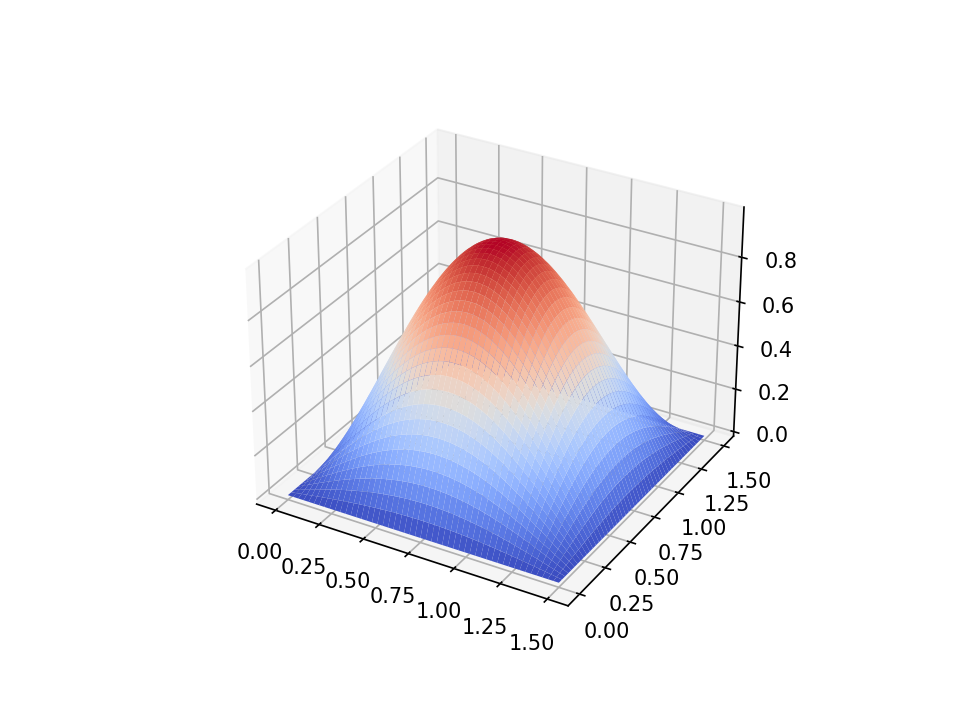

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook
# Рисуем моду
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm)

In [36]:
# visualisation
fps = 10 # frame per sec
frn = 50 # frame number of the animation

In [37]:
t = np.linspace(0, 4 * np.pi / w11, frn)
z_arr = np.array([zz * np.cos(w11 * i + np.pi / 2) for i in t])

<IPython.core.display.Javascript object>


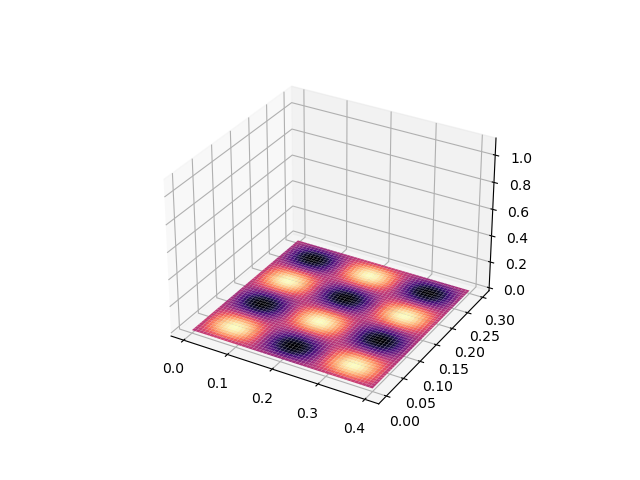

In [38]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(xx, yy, zarray[frame_number], cmap="magma")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(xx, yy, z_arr[0], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(0,1.1)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(z_arr, plot), interval=1000/fps)

In [39]:
fn = '3x4mode'
ani.save(fn+'.gif',writer='imagemagick',fps=fps)